In [1]:
BUCKET_NAME = 'xxx' 
UNIQUE_ID = 'xxx'
OBS_BASE_PATH = BUCKET_NAME

In [2]:
from modelarts.session import Session
session = Session(access_key='xxx',secret_key='xxx', project_id='xxx', region_name='cn-north-4')

ModuleNotFoundError: No module named 'modelarts'

In [3]:
# 下载词性标注结果文件为后续实验做准备
session.download_data(bucket_path=OBS_BASE_PATH+'/textanalysis/results/part_of_speech_results.csv', path='./pos_results.csv')
# 下载实体识别结果文件为后续实验做准备
session.download_data(bucket_path=OBS_BASE_PATH+'/textanalysis/results/entity_results.csv', path='./entity_results.csv')
# 下载聚类结果文件为后续实验做准备
session.download_data(bucket_path=OBS_BASE_PATH+'/textanalysis/results/cluster_results.csv', path='./cluster_results.csv')

NameError: name 'session' is not defined

In [4]:
#加载Python库
#加载数据预处理模块
import pandas as pd
#数据读取
df = pd.read_csv(r"pos_results.csv")
df.head()

FileNotFoundError: [Errno 2] File pos_results.csv does not exist: 'pos_results.csv'

In [5]:
data = df[0:1]['part_of_speech'].values
identify = df[0:1]['id'].values
part_of_speech = []
pos_values = []
word_list = data[0].split(' ')
for word in word_list:
    pos_word = word.split('/')
    pos_values.append(pos_word[1])
    part_of_speech.append(pos_word)
print(part_of_speech)
pos_values = list(set(pos_values))
print(pos_values)

NameError: name 'df' is not defined

In [1]:
df_ori = pd.read_csv(r"DXYNews/DXYNews-test.csv",encoding="gbk")
df_ori.head()

NameError: name 'pd' is not defined

In [7]:
# 利用词性结果中的identify找到原数据集文件中对应的原始文本数据
lines = df_ori[df_ori['id']==identify[0]]
lines = lines[0:1]['summary'].values
text = lines[0]
text

NameError: name 'df_ori' is not defined

In [8]:
for keyword in part_of_speech:
    word = keyword[0]
    pos = keyword[1]
    if pos == 'n':
        new_word = '\033[41m' + word + '\033[0m' # red background
        len_w = len(word)
        len_t = len(text)
        for i in range(len_t - len_w, -1, -1):
            if text[i: i + len_w] == word:
                text = text[:i] + new_word + text[i + len_w:]
    elif pos == 'v':
        new_word = '\033[42m' + word + '\033[0m' # green background
        len_w = len(word)
        len_t = len(text)
        for i in range(len_t - len_w, -1, -1):
            if text[i: i + len_w] == word:
                text = text[:i] + new_word + text[i + len_w:]
print(text)

NameError: name 'part_of_speech' is not defined

In [9]:
#数据读取
df_en = pd.read_csv(r"entity_results.csv")
df_en.head()

entity      id
0                    浙江 感染者 杭州 复阳  114746
1                     阳性 核酸 样本 全员  119311
2        哈尔滨 机场 巴士 大庆 记者 总台 线路 旅客  119241
3  网络 互联网 新闻 公司 记者 风险 业务 百度 首席 旗下  119250
4  疫情 通报 关键 新闻 感染者 病例 物资 医疗 报告 阶段  119218

In [10]:
data = df_en[0:1]['entity'].values
identify = df_en[0:1]['id'].values
keyword_list = data[0].split(' ')
keyword_list

['浙江', '感染者', '杭州', '复阳']

In [11]:
# 利用词性结果中的identify找到原数据集文件中对应的原始文本数据
lines = df_ori[df_ori['id']==identify[0]]
lines = lines[0:1]['summary'].values
text = lines[0]
text

NameError: name 'df_ori' is not defined

In [12]:
for keyword in keyword_list:
    new_word = '\033[43m' + keyword + '\033[0m' # yellow background
    len_w = len(keyword)
    len_t = len(text)
    for i in range(len_t - len_w, -1, -1):
        if text[i: i + len_w] == keyword:
            text = text[:i] + new_word + text[i + len_w:]
print(text)

NameError: name 'text' is not defined

In [13]:
#数据读取
df_cluster = pd.read_csv(r"cluster_results.csv",encoding="gbk")
df_cluster.head()

id                                            summary  cluster
0  114746                              ?浙江杭州发现一例境外输入复阳无症状感染者        1
1  119311              河北｜石家庄：第三轮全员核酸检出阳性样本 30 例 83.3% 来自隔离点        1
2  119241  记者从哈尔滨机场了解到：由于疫情防控工作需要，根据相关部门要求，即日（1月22日）起，哈尔滨...        1
3  119250  1月22日，银保监会首席风险官兼新闻发言人肖远企在国务院新闻办公室举行的新闻发布会上回答记者...        1
4  119218  22日上午10时，吉林省通化市召开疫情防控第九场新闻发布会。会上，通化市副市长蒋海燕通报，2...        1

In [15]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba.analyse

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\emmal\AppData\Local\Temp\jieba.cache
Loading model cost 0.887 seconds.
Prefix dict has been built successfully.


{'病例': 1.0, '疫情': 0.9526201490357312, '肺炎': 0.5469113472423532, '新冠': 0.5354540748034916, '核酸': 0.40080876095521073, '发布会': 0.32644791383753813, '小区': 0.3066355513518012, '报告': 0.29663258718117275, '新闻': 0.2926355420122817, '人员': 0.2747044179083057, '措施': 0.2729382812156261, '社区': 0.2385211706045078, '北京': 0.20039705112213807, '阳性': 0.20024221802645115, '街道': 0.19994121182215202, '藁城': 0.19988576097916538, '结果': 0.1980981187602659, '通报': 0.18953136571056162, '感染者': 0.18473712490267122, '医院': 0.16915457788106653, '情况': 0.1681734372282628, '地区': 0.1573369136932511, '风险': 0.15013158527240691, '石家庄市': 0.14586407547451152, '医学观察': 0.13923737286029064, '国家': 0.13468185303020927, '村镇': 0.13035203221071084, '上海': 0.12678880083171457, '居民': 0.1232097186526815, '河北': 0.11367388114916874, '示威者': 0.1108794093740911, '新乐市': 0.10917546708794522, '企业': 0.10916954161318879, '辽宁': 0.10906146497425674, '非洲': 0.10695447298411713, '记者': 0.10503042582049894, '中国': 0.10257943983371808, '阴性': 0.1004095468495

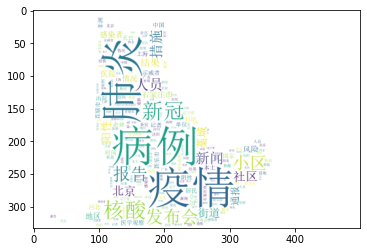

In [16]:
# 以cluster=1的聚类结果为例
cluster1 = df_cluster[df_cluster['cluster']==1]
cluster1 = ' '.join(cluster1['summary'].values)

# 提取cluster 1的主题关键词
kw1 = jieba.analyse.textrank(cluster1,topK=50,withWeight=True,allowPOS=('ns','n'))
words_frequence = {x[0]:x[1] for x in kw1}
print(words_frequence)
backgroud_Image=plt.imread('cat.jpg') # 准备背景样式
# 若是有中文的话，font_path ='simsun.ttc'必须添加，不然会出现方框，不出现汉字
# simsun.ttc为汉字编码文件，可以从本地windows系统找一个汉字编码文件上传， 如C:\\Windows\Fonts下有许多汉字编码文件
wordcloud = WordCloud(font_path ='simsun.ttc',mask=backgroud_Image,repeat=True,background_color='white')
wordcloud = wordcloud.fit_words(words_frequence)
plt.imshow(wordcloud)
plt.show()

In [17]:
#数据读取
df_dxy = pd.read_csv(r"DXYdata.csv",encoding="gbk")
df_dxy.head()

Date Province  Confirmed
0  2020/1/22       福建          1
1  2020/1/23       福建          5
2  2020/1/24       福建         10
3  2020/1/25       福建         18
4  2020/1/26       福建         35

In [18]:
df_dxy.sort_values(by="Date" , inplace=True, ascending=True) 
df_dxy.head()

Date Province  Confirmed
0    2020/1/22       福建          1
121  2020/1/22       北京         14
1    2020/1/23       福建          5
122  2020/1/23       北京         22
2    2020/1/24       福建         10

In [19]:
!pip install pyecharts

Looking in indexes: https://repo.huaweicloud.com/repository/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [20]:
from pyecharts import options as opts 
from pyecharts.charts import Geo

# 以2020/1/22号为例画静态地图
# 可通过for循环实现每个日期地图的生成
Date1 = df_dxy[df_dxy['Date']=='2020/1/22']
province = list(Date1['Province'])
num = list(Date1['Confirmed'])
print(province)
print(num)

c = (
    Geo()
    .add_schema(maptype="china")
    .add("疫情地图", [list(z) for z in zip(province, num)])
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(),
        title_opts=opts.TitleOpts(title="疫情地图示例"),
    )
)

c.render(path="DXYMap.html")


['福建', '北京']
[1, 14]


'C:\\Users\\emmal\\DXYMap.html'